<a href="https://colab.research.google.com/github/lu2914/FAIR-repo/blob/main/FAIRness_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pinning the versions
Here, all packages used throughout the coding are imported and pinned to specific versions. The packages need fairly specific versions to run together smoothly, and whilst these are sure to work together, if even one updates in the future, all packages likely need to.

In [ ]:
%pip install pandas==2.2.2 numpy==2.0.2 matplotlib==3.9.0 seaborn==0.13.0

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {mpl.__version__}")
print(f"seaborn version: {sns.__version__}")

pandas version: 2.2.2
numpy version: 2.0.2
matplotlib version: 3.9.0
seaborn version: 0.13.0


# Getting the Data
The data below is generated for demonstration purposes, and was written with the help of generative AI as a test for how said tools function. It mimics data gathered from survery respondents regarding percieved fairness in various settings. It is then saved as a .csv file for ease of use.

In [ ]:
# Set seed for identical results
np.random.seed(42)

# Number of survey responses
n_responses = 200

# Generate the genders of the respondents
gender = np.random.choice(["Male", "Female", "Other"], size=n_responses, p=[0.45, 0.45, 0.1])

# Generate the ages of the respondents
age = np.random.normal(loc=35, scale=15, size=n_responses)
age = np.clip(age, 18, 80) # Clip values to a reasonable range
age[np.random.choice(n_responses, size=10, replace=False)] = np.nan # Add missing values
age[np.random.choice(n_responses, size=5, replace=False)] = np.random.choice([150, 200, -50]) # Add outliers

# Generate perceived fairness data (scale from 1 to 5, with some missing values)
fairness_work = np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_responses, p=[0.1, 0.2, 0.4, 0.2, 0.05, 0.05])
fairness_study = np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_responses, p=[0.25, 0.4, 0.2, 0.05, 0.05, 0.05])
fairness_freetime = np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_responses, p=[0.2, 0.2, 0.2, 0.2, 0.15, 0.05])

# Create DataFrame
survey_data = pd.DataFrame({
    'gender': gender,
    'age': age,
    'work_fairness': fairness_work,
    'study_fairness': fairness_study,
    'freetime_fairness': fairness_freetime
})

# Export to .csv
survey_data.to_csv('survey_data.csv')

# Filtering the Data
Removal of all outliers and NaN values.

In [ ]:
# Load the data from the CSV file
survey_df = pd.read_csv('survey_data.csv')

# Drop rows with any NaN values
survey_df_cleaned = survey_df.dropna()

# Filter out age outliers (less than 18 or greater than 80)
survey_df_filtered = survey_df_cleaned[(survey_df_cleaned['age'] >= 18) & (survey_df_cleaned['age'] <= 80)]

# Processing the Data
Calculating means, standard deviations, and grouping the values based on metadata.

In [ ]:
# Calculate key metrics for numerical columns
numerical_metrics = survey_df_filtered[['age', 'work_fairness', 'study_fairness', 'freetime_fairness']].describe()

# Calculate value counts for categorical columns
gender_counts = survey_df_filtered['gender'].value_counts()

# Display the calculated metrics and counts
display("Key Metrics for Numerical Columns:", numerical_metrics)
display("Value Counts for Gender:", gender_counts)

# Prepare data for visualization (e.g., group by gender and calculate mean fairness)
fairness_by_gender = survey_df_filtered.groupby('gender')[['work_fairness', 'study_fairness', 'freetime_fairness']].mean().reset_index()

# Display the prepared data for visualization
display("Mean Fairness Scores by Gender:", fairness_by_gender)

'Key Metrics for Numerical Columns:'

,age,work_fairness,study_fairness,freetime_fairness
count,156.000000,156.000000,156.000000,156.000000
mean,36.456836,3.006410,2.179487,2.942308
std,13.281731,0.912259,1.019090,1.424397
min,18.000000,1.000000,1.000000,1.000000
25%,24.695961,2.000000,1.750000,2.000000
50%,36.182590,3.000000,2.000000,3.000000
75%,44.869218,4.000000,3.000000,4.000000
max,80.000000,5.000000,5.000000,5.000000


'Value Counts for Gender:'

,count
gender,
Male,73
Female,68
Other,15


'Mean Fairness Scores by Gender:'

,gender,work_fairness,study_fairness,freetime_fairness
0,Female,3.058824,2.250000,3.000000
1,Male,2.958904,2.054795,2.917808
2,Other,3.000000,2.466667,2.800000


# Outputting figures
Here, figures displaying the key data are created and outputted.

/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.12/dist-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


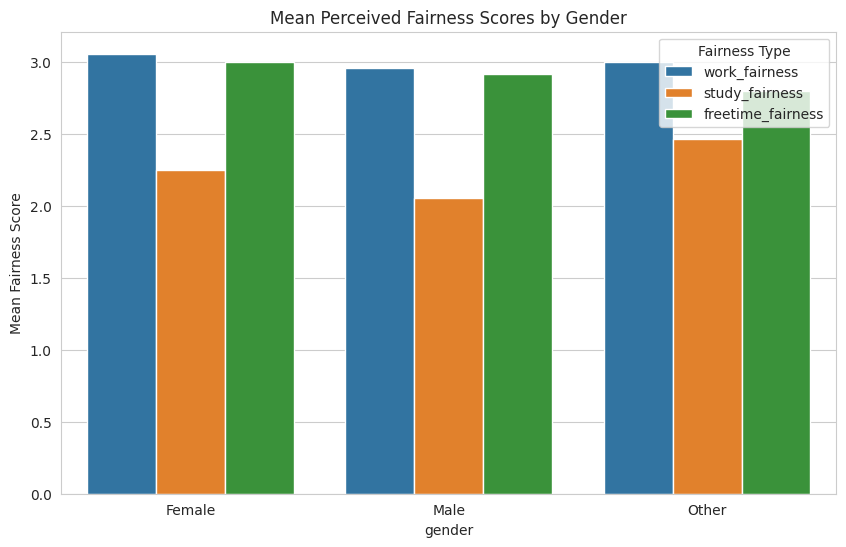

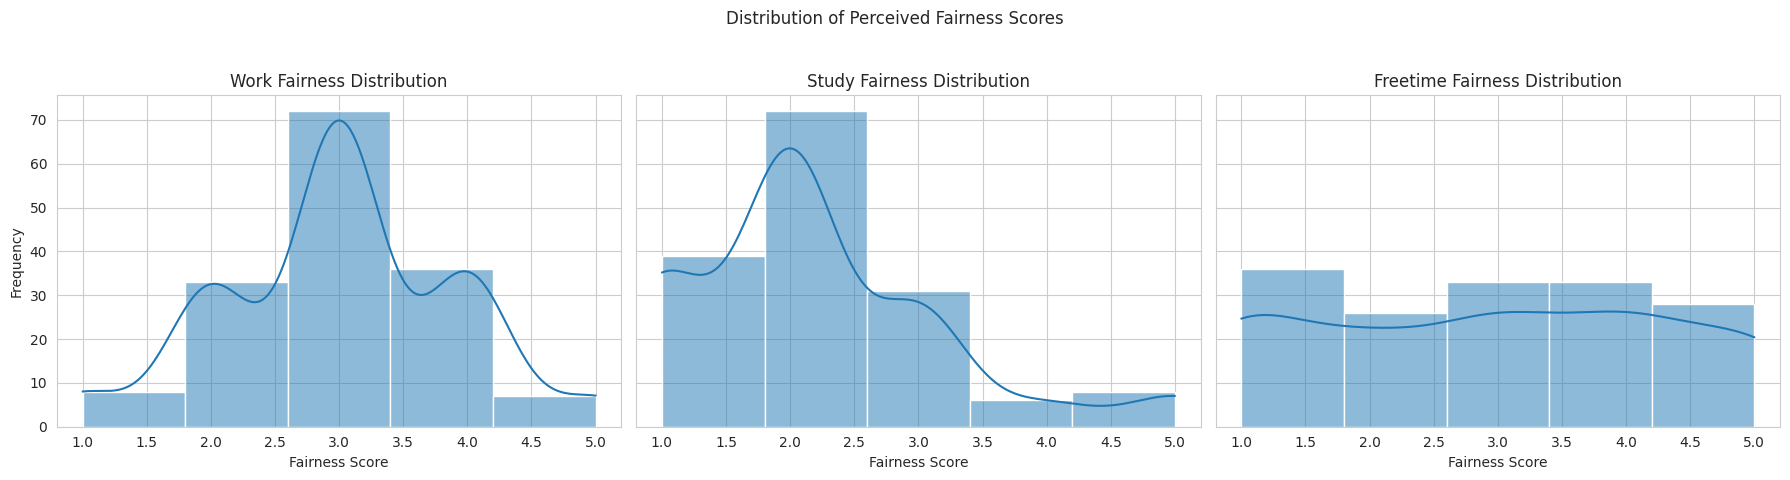

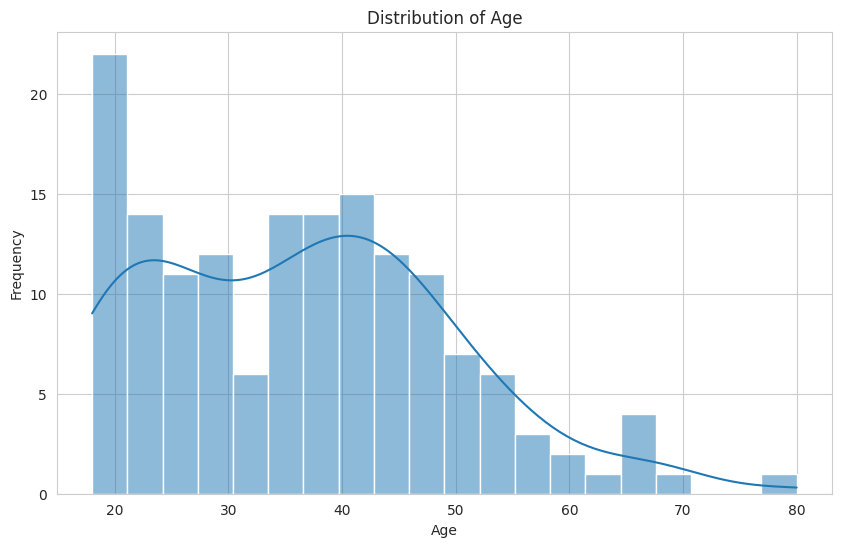

In [ ]:
# Set the style for the plots
sns.set_style("whitegrid")

# Reshape the dataframe for plotting separate bars
fairness_melted = fairness_by_gender.melt(id_vars='gender', var_name='fairness_type', value_name='mean_score')

# Create a bar plot for mean fairness scores by gender with separate bars and error bars
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='mean_score', hue='fairness_type', data=fairness_melted, errorbar='sd') # Added errorbar='sd' for standard deviation
plt.ylabel('Mean Fairness Score')
plt.title('Mean Perceived Fairness Scores by Gender')
plt.legend(title='Fairness Type')
plt.show()

# Create histograms for the distribution of fairness scores in survey_df_filtered
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
fig.suptitle('Distribution of Perceived Fairness Scores')

sns.histplot(survey_df_filtered['work_fairness'].dropna(), kde=True, ax=axes[0], bins=5)
axes[0].set_title('Work Fairness Distribution')
axes[0].set_xlabel('Fairness Score')
axes[0].set_ylabel('Frequency')

sns.histplot(survey_df_filtered['study_fairness'].dropna(), kde=True, ax=axes[1], bins=5)
axes[1].set_title('Study Fairness Distribution')
axes[1].set_xlabel('Fairness Score')
axes[1].set_ylabel('Frequency')

sns.histplot(survey_df_filtered['freetime_fairness'].dropna(), kde=True, ax=axes[2], bins=5)
axes[2].set_title('Freetime Fairness Distribution')
axes[2].set_xlabel('Fairness Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Create a histogram for the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(survey_df_filtered['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# FAIR data principles

This (mock) markdown document complies with the FAIR principles in several ways. Firstly, its mere presence allows for insight into the data wrangling, processing, and interpretation (R). Acessible file formats such as .csv and the usage of common packages (numpy, seaborn, pandas) ensure ease of incorperation into other projects (I). The project is uploaded to GitHub, and is acessible with on the site, is tagged with several keywords, and has a lenient licence for use (F, A).